<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

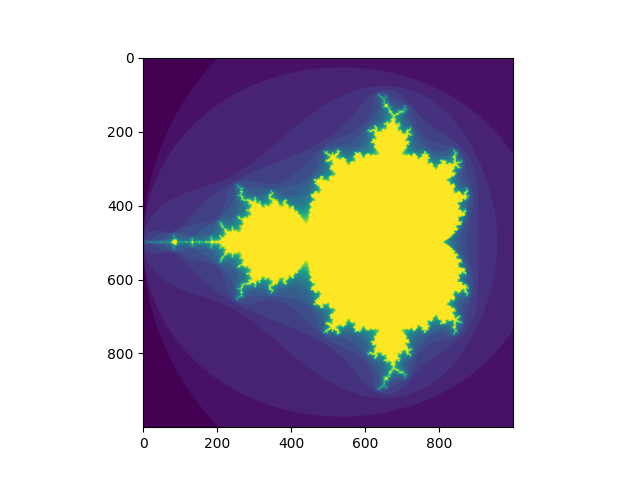

In [4]:
# à vous de jouer
def mandelbrot(w, h):
    re = np.linspace(-2, 0.8, w)
    im = np.linspace(-1.4, 1.4, h)
    x, y = np.meshgrid(re, im)
    def max_iter(x, y):
        c = x + 1j*y
        n = 0
        zn = c
        while abs(zn) <= 2 and n <= 20:
            n += 1
            zn = zn**2 + c
        return n
    vec_max_iter = np.vectorize(max_iter)
    diverge = vec_max_iter(x, y)
    plt.imshow(diverge)
    plt.show()

def mandelbrot_v2(w, h, xinf = -2, xsup = 0.8, yinf = -1.4, ysup = 1.4, maxit = 20):
    re = np.linspace(xinf, xsup, w)
    im = np.linspace(yinf, ysup, h)
    x, y = np.meshgrid(re, im)
    def max_iter(x, y):
        c = x + 1j*y
        n = 0
        zn = c
        while abs(zn) <= 2 and n <= maxit:
            n += 1
            zn = zn**2 + c
        return n
    vec_max_iter = np.vectorize(max_iter)
    diverge = vec_max_iter(x, y)
    plt.imshow(diverge)
    plt.show()
    #les formats disponibles sont 'jpg', 'png", 'pdf', et notamment 'svg' pour une image vectorielle
    plt.imsave('media/imvec.svg', diverge)

mandelbrot_v2(1000,1000)

<img src="media/imvec.svg">

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook